In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from matplotlib import gridspec

In [2]:
pi = np.pi

In [3]:
def Bdip(x, y, z, x0, y0, z0, mx, my, mz):
    xp = x-x0
    yp = y-y0
    zp = z-z0
    rp = (xp**2 + yp**2 + zp**2)**(1/2)
    rpm = (xp*mx + yp*my + zp*mz)
    Bx = (3*xp*rpm/(rp**5)) - (mx/(rp**3))
    By = (3*yp*rpm/(rp**5)) - (my/(rp**3))
    Bz = (3*zp*rpm/(rp**5)) - (mz/(rp**3))
    return (1e-7)*np.array([Bx, By, Bz])

vBdip = np.vectorize(Bdip)

# magnet geometry, dipole approximation

Approximate the field using dipoles centered on the stacks. The magnets are arranged in a rectangle, 68 mm wide x 88 mm tall. With their moments pointing out of the plane of the rectangle (opposite on top and bottom). Will use a coordinate system with x along the short side, y along the long side and z out of the plane.

In [4]:
m_volume = (3/8)*(3/4)*(1/4)*(2.54**3)/(1e6)
m_magnetization = (13e3)*(1e3)/(4*pi)
num_magnets = 3
m0 = num_magnets*m_volume*m_magnetization
print('Magnetization = {:.2e}'.format(m_magnetization))
print('Total magnetic moment per stack = {:.2f} A m^2'.format(m0))

Magnetization = 1.03e+06
Total magnetic moment per stack = 3.58 A m^2


In [5]:
s1, s2 = 30e-3, -39e-3
r1 = np.array([0, -s1, s2])
r2 = np.array([0, s1, s2])
r3 = np.array([0, -s1, -s2])
r4 = np.array([0, s1, -s2])

theta_err = 0*np.pi/180
theta_err2 = 0*np.pi/180
m1 = -m0*np.array([1,0,0])
m2 = -m0*np.array([np.cos(theta_err), 0, np.sin(theta_err)])
m3 = m0*np.array([np.cos(theta_err2), np.sin(theta_err2),0])
m4 = -m1
rs = [r1, r2, r3, r4]
ms = [m1, m2, m3, m4]

In [6]:
res = 50
x = np.linspace(-1,1,res)*(30e-3)
z = np.linspace(-1,1,res)*(30e-3)
xx, zz = np.meshgrid(x,z)
yy = np.ones_like(xx)*0
dx = x[1]-x[0]

In [7]:
B2DMOT = np.zeros_like(xx)
for i in range(len(rs)):
    B2DMOT = B2DMOT + Bdip(xx, yy, zz, rs[i][0], rs[i][1], rs[i][2], ms[i][0], ms[i][1], ms[i][2])
# B2DMOT = np.reshape(B2DMOT, np.shape(r))

In [8]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

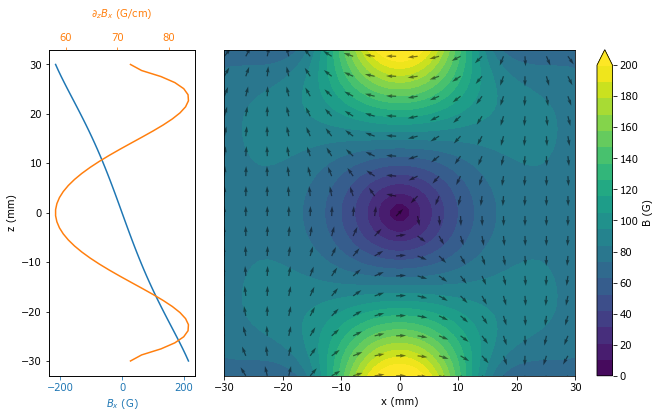

In [9]:
eps = 1e-15
BContours = np.linspace(0,1,20)*(200)
fig = plt.figure(figsize=[11,6])
spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1, 3])
ax0 = fig.add_subplot(spec[0])
ax0.plot(B2DMOT[0][:,int(res/2)]*(1e4), x*(1e3))
ax0.set_xlabel(r'$B_x$ (G)', color=colors[0])
ax0.set_ylabel('z (mm)')
ax0.tick_params(axis='x', colors=colors[0])
axcut2 = ax0.twiny()
axcut2.plot(-np.gradient(B2DMOT[0][:,int(res/2)])*(1e4)/(dx*(1e2)), x*(1e3),color=colors[1])
#axcut2.plot(58,0,'ro')
axcut2.xaxis.set_label_coords(0.5, 1.10)
axcut2.set_xlabel(r'$\partial_z B_x$ (G/cm)', color=colors[1])
axcut2.tick_params(axis='x', colors=colors[1])
                 
ax1 = fig.add_subplot(spec[1])
cp = ax1.contourf(xx*(1e3), zz*(1e3), np.linalg.norm(B2DMOT, axis=0)*(1e4), BContours, extend='max')
ax1.yaxis.set_ticks([])
cbar = plt.colorbar(cp, ax=ax1)
cbar.set_ticks(np.arange(0, 201, 20))
cbar.ax.set_ylabel('B (G)')
qs = 3
B2DMOTPlaneNorm = np.sqrt(B2DMOT[0]**2 + B2DMOT[2]**2)[::qs,::qs]
ax1.quiver(xx[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOT[0][::qs,::qs]/B2DMOTPlaneNorm, B2DMOT[2][::qs,::qs]/B2DMOTPlaneNorm, scale=35, alpha=0.5)
ax1.set_xlabel('x (mm)')

plt.subplots_adjust(wspace=0.1)

In [17]:
np.shape(B2DMOT)

(3, 50, 50)

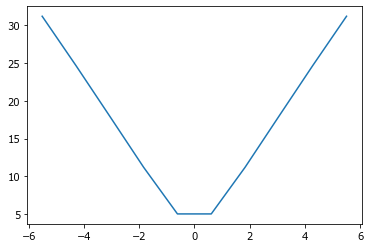

In [22]:
plt.plot(xx[25, 20:-20]*(1e3), np.linalg.norm(B2DMOT, axis=0)[25,  20:-20]*(1e4))

In [265]:
np.linalg.norm(B2DMOT[:,int(res/2),int(res/2)])*(1e4)

0.1172047314677081

In [171]:
dBx = -np.gradient(B2DMOT[0][:,int(res/2)])*(1e4)/(dx*(1e2))
dBz = -np.gradient(B2DMOT[2][int(res/2),:])*(1e4)/(dx*(1e2))
print(dBx[int(res/2)], dBz[int(res/2)])

58.100724333175485 57.876178273806445


## along MOT axis

In [162]:
res = 101
y = np.linspace(-1,1,res)*(20e-3)
z = np.linspace(-1,1,res)*(20e-3)
yy, zz = np.meshgrid(y,z)
xx = np.ones_like(yy)*0
dy = y[1]-y[0]

In [163]:
B2DMOTyz = np.zeros_like(xx)
for i in range(len(rs)):
    B2DMOTyz = B2DMOTyz + Bdip(xx, yy, zz, rs[i][0], rs[i][1], rs[i][2], ms[i][0], ms[i][1], ms[i][2])

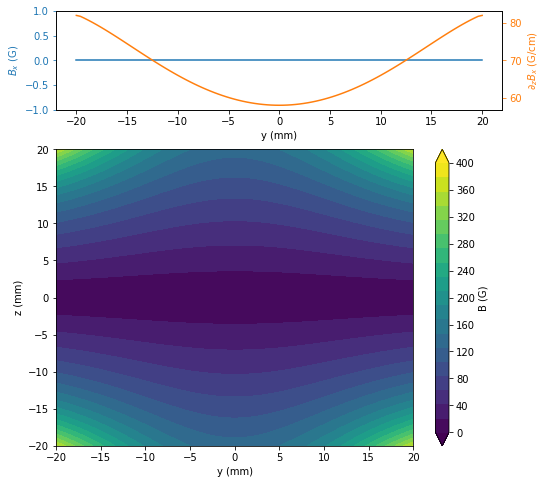

In [164]:
eps = 1e-15
BContours = np.linspace(0,1,20)*(400)
fig = plt.figure(figsize=[8,8])
spec = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1, 3])
ax0 = fig.add_subplot(spec[0])
ax0.plot(y*(1e3), B2DMOTyz[0][int(res/2),:]*(1e4)/2)
ax0.set_ylabel(r'$B_x$ (G)', color=colors[0])
ax0.set_xlabel('y (mm)')
ax0.tick_params(axis='y', colors=colors[0])
ax0.set_ylim([-1,1])
axcut2 = ax0.twinx()
axcut2.plot(y*(1e3), -np.gradient(B2DMOTyz[0][:,int(res/2)])*(1e4)/(dy*(1e2)),color=colors[1])
# axcut2.set_ylim([-1,1])
axcut2.set_ylabel(r'$\partial_z B_x$ (G/cm)', color=colors[1])
axcut2.tick_params(axis='y', colors=colors[1])

ax1 = fig.add_subplot(spec[1])
cp = ax1.contourf(yy*(1e3), zz*(1e3), np.linalg.norm(B2DMOTyz, axis=0)*(1e4), BContours, extend='both')
# ax1.yaxis.set_ticks([])
ax1.set_xlabel('y (mm)')
ax1.set_ylabel('z (mm)')
cbar = plt.colorbar(cp, ax=ax1)
cbar.set_ticks(np.arange(0, 405, 40))
cbar.ax.set_ylabel('B (G)')
# qs = 3
# B2DMOTPlaneNormyz = np.sqrt(B2DMOTyz[0]**2 + B2DMOTyz[2]**2)[::qs,::qs]
# ax1.quiver(yy[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOTyz[0][::qs,::qs]/B2DMOTPlaneNormyz, B2DMOTyz[2][::qs,::qs]/B2DMOTPlaneNormyz, scale=35, alpha=0.5)
# ax1.set_xlabel('x (mm)')

plt.subplots_adjust(wspace=0.1)

## bar magnets

Approximate the bar magnet as a set of equally spaced dipoles.

In [402]:
mx0, my0, mz0 = 0.020, 0.01, 0.020
dms = 0.002
m0d = m0/(mx0*my0*mz0/(dms**3))
m0/m0d

500.00000000000006

In [403]:
s1, s2 = 30e-3, 39e-3
r1 = np.array([0, -s1, s2])
r2 = np.array([0, s1, s2])
r3 = np.array([0, -s1, -s2])
r4 = np.array([0, s1, -s2])

m1 = m0d*np.array([1,0,0])
m2, m3, m4 = m1, -m1, -m1
rs = [r1, r2, r3, r4]
ms = [m1, m2, m3, m4]

In [404]:
def Bbar(x, y, z, x0, y0, z0, mx, my, mz):
    B = np.zeros_like(x)
    for xm in np.arange(-mx0/2, mx0/2 + dms, dms):
        for ym in np.arange(-my0/2, my0/2 + dms, dms):
            for zm in np.arange(-mz0/2, mz0/2 + dms, dms):
                xp = x - x0 + xm
                yp = y - y0 + ym
                zp = z - z0 + zm
                rp = (xp**2 + yp**2 + zp**2)**(1/2)
                rpm = (xp*mx + yp*my + zp*mz)
                Bx = 3*xp*rpm/(rp**5) - mx/(rp**3)
                By = 3*yp*rpm/(rp**5) - my/(rp**3)
                Bz = 3*zp*rpm/(rp**5) - mz/(rp**3)
                B = B + np.array([Bx, By, Bz])
    return (1e-7)*B

In [405]:
res = 50
x = np.linspace(-1,1,res)*(30e-3)
z = np.linspace(-1,1,res)*(30e-3) 
xx, zz = np.meshgrid(x,z)
yy = np.ones_like(xx)*0

In [406]:
B2DMOTf = np.zeros_like(xx)
for i in range(len(rs)):
    B2DMOTf = B2DMOTf + Bbar(xx, yy, zz, rs[i][0], rs[i][1], rs[i][2], ms[i][0], ms[i][1], ms[i][2])

Text(0, 0.5, 'z (mm)')

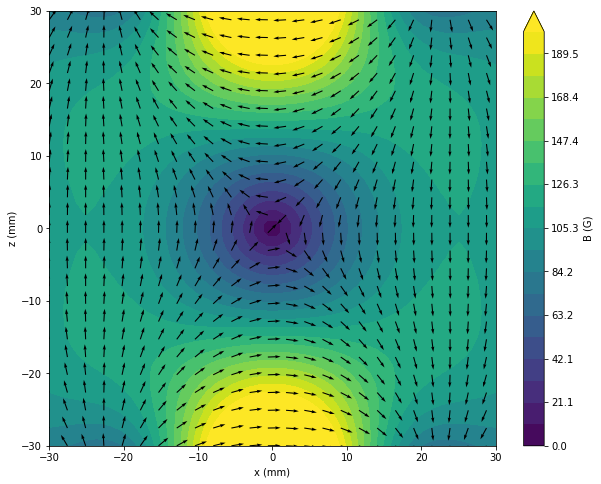

In [377]:
BContours = np.linspace(0,1,20)*(200)
plt.figure(1, figsize=[10,8])
plt.clf()
plt.contourf(xx*(1e3), zz*(1e3), np.linalg.norm(B2DMOTf, axis=0)*(1e4), BContours, extend='max')
# plt.contourf(xx*(1e3), zz*(1e3), B2DMOT[0]*(1e4), BContours, extend="both")

cbar = plt.colorbar()
# cbar.set_ticks(np.arange(-100,105, 20))
cbar.ax.set_ylabel('B (G)')
qs = 2
B2DMOTPlaneNorm = np.sqrt(B2DMOTf[0]**2 + B2DMOTf[2]**2)[::qs,::qs]
# plt.quiver(xx[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOT[0][::qs,::qs], B2DMOT[2][::qs,::qs], scale=5)
plt.quiver(xx[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOTf[0][::qs,::qs]/B2DMOTPlaneNorm, B2DMOTf[2][::qs,::qs]/B2DMOTPlaneNorm, scale=35)
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')

In [378]:
np.linalg.norm(B2DMOTf, axis=0)[int(res/2), int(res/2)]*(1e4)

6.8956638591217

## comparison in the 2D MOT finite vs. dipole

Text(0.5, 1.0, '|B_finite - B_dipole|')

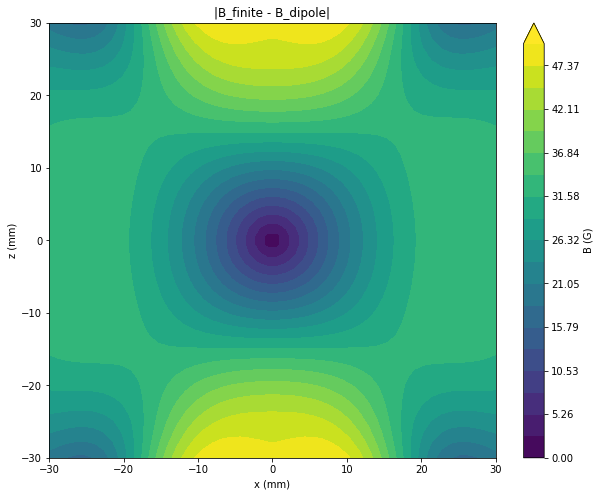

In [422]:
BContours = np.linspace(0,1,20)*(50)
plt.figure(1, figsize=[10,8])
plt.clf()
plt.contourf(xx*(1e3), zz*(1e3), np.linalg.norm(B2DMOTf-B2DMOT, axis=0)*(1e4), BContours, extend='max')
# plt.contourf(xx*(1e3), zz*(1e3), B2DMOT[0]*(1e4), BContours, extend="both")

cbar = plt.colorbar()
# cbar.set_ticks(np.arange(-100,105, 20))
cbar.ax.set_ylabel('B (G)')
# qs = 2
# B2DMOTPlaneNorm = np.sqrt(B2DMOTf[0]**2 + B2DMOTf[2]**2)[::qs,::qs]
# # plt.quiver(xx[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOT[0][::qs,::qs], B2DMOT[2][::qs,::qs], scale=5)
# plt.quiver(xx[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOTf[0][::qs,::qs]/B2DMOTPlaneNorm, B2DMOTf[2][::qs,::qs]/B2DMOTPlaneNorm, scale=35)
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
plt.title('|B_finite - B_dipole|')

Text(0, 0.5, 'z (mm)')

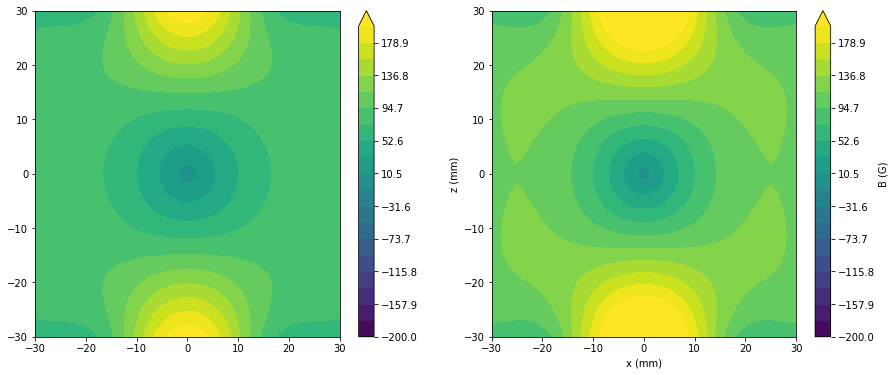

In [418]:
BContours = np.linspace(-1,1,20)*(200)
fig, ax = plt.subplots(ncols = 2, figsize=[15,6])
im0 = ax[0].contourf(xx*(1e3), zz*(1e3), np.linalg.norm(B2DMOT, axis=0)*(1e4), BContours, extend='max')
cbar = plt.colorbar(im0, ax=ax[0])
im1 = ax[1].contourf(xx*(1e3), zz*(1e3), np.linalg.norm(B2DMOTf, axis=0)*(1e4), BContours, extend='max')
# plt.contourf(xx*(1e3), zz*(1e3), B2DMOT[0]*(1e4), BContours, extend="both")
cbar = plt.colorbar(im1, ax=ax[1])

# cbar.set_ticks(np.arange(-100,105, 20))
cbar.ax.set_ylabel('B (G)')
# qs = 2
# B2DMOTPlaneNorm = np.sqrt(B2DMOTf[0]**2 + B2DMOTf[2]**2)[::qs,::qs]
# # plt.quiver(xx[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOT[0][::qs,::qs], B2DMOT[2][::qs,::qs], scale=5)
# plt.quiver(xx[::qs,::qs]*(1e3), zz[::qs,::qs]*(1e3), B2DMOTf[0][::qs,::qs]/B2DMOTPlaneNorm, B2DMOTf[2][::qs,::qs]/B2DMOTPlaneNorm, scale=35)
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
# plt.title('|B_finite - B_dipole|')